In [1]:
#          ___..._
#     _,--' )     "`-.    MUSHROOM
#   ,'.  .      (  )  \   CLASSIFICATION
#  /:. .     .         .  ALGORITHM
# |;..) .  (  )  _..--'
# `--:...-,-'""\          We use keras to determine the likelihood that a mushroom 
#         |:.  `.         is safe to eat based on given criteria. 
#         l;.   l         (For academic purposes only!)
#         `|:.   |
#          |:.   `.,      Anita Russo (101073718)
#         .l;.    j, ,    Christopher Hughes (100443694)
#      `. \`;:.   //,/    Matthew Geddes (101112109)
#       .\\)`;,|\'/(      Avery Ciezynski (10)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Part #1: Exploring the dataset

In [3]:
# Dataset from: https://www.kaggle.com/uciml/mushroom-classification
# class: e, p (edible, poisonous)

df = pd.read_csv("mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
# Columns are object type, will need to be converted to floating point values

df.columns.dtype

dtype('O')

In [5]:
# Are there any null values to remove? 

df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [6]:
# We have 23 columns, but are they all useful for determining edibility? 

print("Number of columns: ", len(df.columns))
print("Number of rows: ", len(df))

Number of columns:  23
Number of rows:  8124


## Part #2: Graphing correlation between columns and edibility

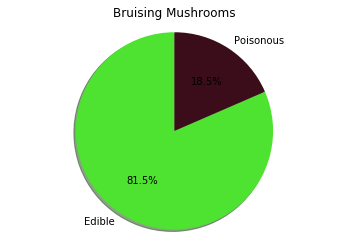

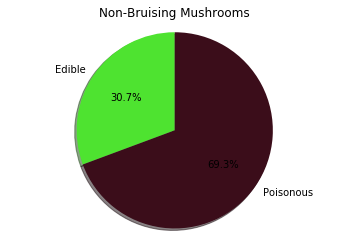

Non-bruising mushrooms are more likely to be poisonous, whereas bruising mushrooms are usually edible


In [7]:
# Check correlation between 'bruises' column and edibility

bruises_edible = len(df[df['bruises'].str.contains('t') & df['class'].str.contains('e')])
bruises_poisonous = len(df[df['bruises'].str.contains('t') & df['class'].str.contains('p')])
nonbruise_edible = len(df[df['bruises'].str.contains('f') & df['class'].str.contains('e')])
nonbruise_poisonous = len(df[df['bruises'].str.contains('f') & df['class'].str.contains('p')])

#plot in pie chart

labels = 'Edible', 'Poisonous'
sizes = [bruises_edible, bruises_poisonous]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', colors=('#4ee330','#3b0d1a'), shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Bruising Mushrooms")

plt.show()

sizes = [nonbruise_edible, nonbruise_poisonous]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', colors=('#4ee330','#3b0d1a'), shadow=True, startangle=90)
ax1.axis('equal')  
plt.title("Non-Bruising Mushrooms")

plt.show()

print("Non-bruising mushrooms are more likely to be poisonous, whereas bruising mushrooms are usually edible")

n    3528
f    2160
s     576
y     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64


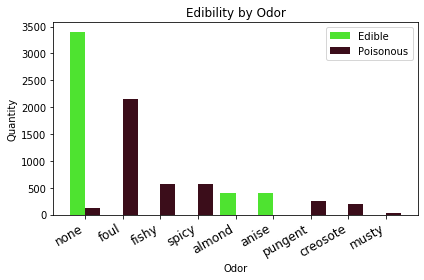

From the above, we can see:
None, almond and anise are likely to be edible
Foul, fishy, spicy, pungent, creose and musty are likely to be poisonous


In [8]:
# using the odor column

odors = df['odor'].value_counts()
print(odors)

edible = []  
poisonous = [] 

labels = ('none','foul','fishy','spicy','almond','anise','pungent','creosote','musty')
n_groups = len(labels)

#get value counts for each odor in list
num = odors.values.tolist()
#get the value in the rows
odor_labels = odors.axes[0].tolist()

for odor in odor_labels:
    #get number of values for each odor
    size = len(df[df['odor'] == odor].index)
    #get the number of edible values for each odor and append to list
    edibles = len(df[(df['odor'] == odor) & (df['class'] == 'e')].index)
    edible.append(edibles)
    #poisonous is the number of values minus values that are edible
    poisonous.append(size-edibles)
    
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.4

rects1 = plt.bar(index, edible, bar_width, color='#4ee330', label='Edible')
rects2 = plt.bar(index + bar_width, poisonous, bar_width, color='#3b0d1a', label='Poisonous')

plt.xlabel('Odor')
plt.ylabel('Quantity')
plt.title('Edibility by Odor')

plt.xticks(index + bar_width / 2, labels, fontsize=12)

plt.legend()
fig.autofmt_xdate()

plt.tight_layout()

plt.show()

print("From the above, we can see:")
print("None, almond and anise are likely to be edible")
print("Foul, fishy, spicy, pungent, creose and musty are likely to be poisonous")

## Part 3: Training the Neural Network

In [9]:
# drop the class column that we want to predict
X=df.drop('class',axis=1) 
y=df['class']
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [10]:
#e for edible, p for poisonous
y

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: class, Length: 8124, dtype: object

In [11]:
# prepare data by converting to numerical values
from sklearn.preprocessing import LabelEncoder
Encoder_X = LabelEncoder() 
for col in X.columns:
    X[col] = Encoder_X.fit_transform(X[col])
Encoder_y=LabelEncoder()
y = Encoder_y.fit_transform(y)

X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [12]:
#e=0, p=1

y

array([1, 0, 0, ..., 0, 1, 0])

In [13]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential 
from keras.layers import Dense 

from sklearn.model_selection import train_test_split

#split data into training and testing
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=1)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

Using TensorFlow backend.


(6499, 22)
(1625, 22)
(6499,)
(1625,)


In [14]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential # initialize neural network library
from keras.layers import Dense # build our layers library
def build_classifier():
    classifier = Sequential() # initialize neural network
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = x_train.shape[1]))
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn=build_classifier, epochs=28, batch_size=5)
accuracies = cross_val_score(estimator=classifier,X=x_train,y=y_train, cv=3)
mean = accuracies.mean()
variance = accuracies.std()
print("Accuracy mean: "+ str(mean))
print("Accuracy variance: "+ str(variance))

Epoch 1/28
4332/4332 [==============================] - 2s 380us/step - loss: 0.4081 - accuracy: 0.8289
Epoch 2/28
4332/4332 [==============================] - 1s 339us/step - loss: 0.2393 - accuracy: 0.9176
Epoch 3/28
4332/4332 [==============================] - 1s 339us/step - loss: 0.2128 - accuracy: 0.9342
Epoch 4/28
4332/4332 [==============================] - 2s 375us/step - loss: 0.1961 - accuracy: 0.9377
Epoch 5/28
4332/4332 [==============================] - 2s 366us/step - loss: 0.1862 - accuracy: 0.9437
Epoch 6/28
4332/4332 [==============================] - 1s 318us/step - loss: 0.1748 - accuracy: 0.9462
Epoch 7/28
4332/4332 [==============================] - 1s 311us/step - loss: 0.1619 - accuracy: 0.9511
Epoch 8/28
4332/4332 [==============================] - 1s 313us/step - loss: 0.1516 - accuracy: 0.9492
Epoch 9/28
4332/4332 [==============================] - 1s 311us/step - loss: 0.1379 - accuracy: 0.9548
Epoch 10/28
4332/4332 [==============================] - 2s 463u

In [15]:
history = classifier.fit(x_test, y_test, validation_split=0.20, epochs=28, batch_size=5, verbose=1)

Train on 1300 samples, validate on 325 samples
Epoch 1/28
1300/1300 [==============================] - 1s 736us/step - loss: 0.6513 - accuracy: 0.6946 - val_loss: 0.5689 - val_accuracy: 0.6769
Epoch 2/28
1300/1300 [==============================] - 1s 440us/step - loss: 0.4907 - accuracy: 0.8338 - val_loss: 0.4431 - val_accuracy: 0.8954
Epoch 3/28
1300/1300 [==============================] - 1s 509us/step - loss: 0.4025 - accuracy: 0.8992 - val_loss: 0.3873 - val_accuracy: 0.9015
Epoch 4/28
1300/1300 [==============================] - 1s 487us/step - loss: 0.3566 - accuracy: 0.9077 - val_loss: 0.3538 - val_accuracy: 0.9077
Epoch 5/28
1300/1300 [==============================] - 1s 401us/step - loss: 0.3258 - accuracy: 0.9177 - val_loss: 0.3301 - val_accuracy: 0.9077
Epoch 6/28
1300/1300 [==============================] - 1s 402us/step - loss: 0.3006 - accuracy: 0.9223 - val_loss: 0.3131 - val_accuracy: 0.9015
Epoch 7/28
1300/1300 [==============================] - 0s 377us/step - loss:

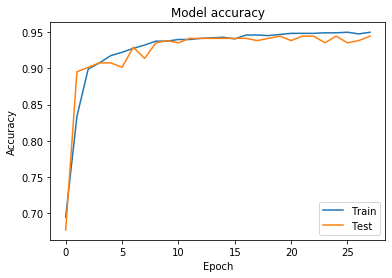

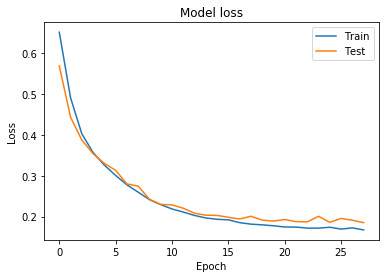

In [16]:
# Plot training & validation accuracy values

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()